In [15]:
!pip install requests beautifulsoup4 lxml pandas matplotlib seaborn

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from urllib.robotparser import RobotFileParser

%matplotlib inline

BASE_URL = "https://www.imdb.com/chart/top/"
HEADERS = {"User-Agent": "Mozilla/5.0 (compatible; DataScienceBot/1.0)"}


In [18]:
import re

# Function to scrape one page of books
def scrape_books_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = []
    for article in soup.find_all('article', class_='product_pod'):
        title = article.h3.a['title']

        # Extract price and remove anything except numbers & dot
        raw_price = article.find('p', class_='price_color').text
        price = float(re.sub(r'[^0-9.]', '', raw_price))

        rating = article.p['class'][1]  # e.g. 'Three', 'Five'
        availability = article.find('p', class_='instock availability').text.strip()

        books.append({
            'Title': title,
            'Price (£)': price,
            'Rating': rating,
            'Availability': availability
        })
    return books

In [19]:
base_url = "http://books.toscrape.com/catalogue/page-{}.html"
all_books = []

# Scrape first 5 pages for demo (you can do all 50 if you want more data)
for page in range(1, 6):
    url = base_url.format(page)
    all_books.extend(scrape_books_page(url))

df = pd.DataFrame(all_books)
print(f"Scraped {len(df)} books")
df.head()

Scraped 100 books


,Title,Price (£),Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [20]:
df.to_csv("books_dataset.csv", index=False)
print("Dataset saved as books_dataset.csv")

Dataset saved as books_dataset.csv


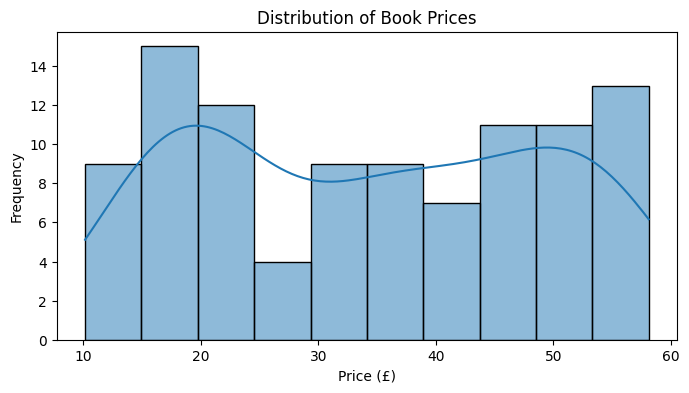

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price (£)'], bins=10, kde=True)
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()